# Homework 1

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip install -q interpret
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Libs and data preparing

In [7]:
import os
import pandas as pd

In [8]:
maths = pd.read_csv('Maths.csv')
port = pd.read_csv('Portuguese.csv')

In [9]:
maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [10]:
port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
maths['isMath'] = 1
port['isMath'] = 0


In [12]:
df = pd.concat([maths, port], ignore_index=True)

In [13]:
df['isMath'].value_counts()

0    649
1    395
Name: isMath, dtype: int64

In [14]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,isMath
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,1


In [15]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'isMath'],
      dtype='object')

In [16]:
import numpy as np
df.drop(['G1', 'G2'], inplace=True, axis=1)
df = pd.get_dummies(df, drop_first=True)
random_permutation = np.random.permutation(df.index)
X_train = df.loc[random_permutation[:int(len(df)*0.8)]]
X_test = df.loc[random_permutation[int(len(df)*0.8):]]

y_train = X_train[['G3']]
y_test = X_test[['G3']]

X_train = X_train.drop(['G3'], axis=1)
X_test = X_test.drop(['G3'], axis=1)

In [17]:
len(X_train.columns)

40

## Data Overview

### Features

In [18]:
# Histograms
import plotly.express as px

In [19]:
fig = px.histogram(df, x="G3", color="isMath", marginal="box", hover_data=df.columns)
fig.write_image('distribution.png')
fig.show(renderer="colab")

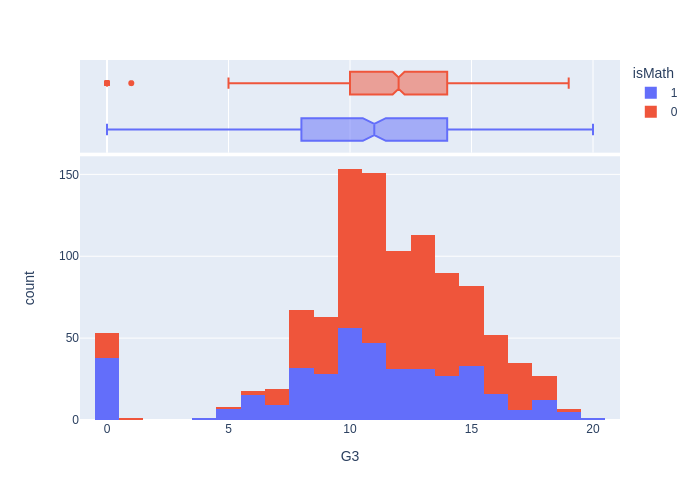

### Firstly we made plots of the distributions over our target variable. We see that we have kind of class imbalance in this dataset since there is lack of 1-4 and 19+ classes. Also number of 5,6,7 is very small. This can indicate future problems with classification. 

### For now, we don't transform our target variable, however in future it would be needed to dig deeper into drivers of grades so that better feature engineering might be constructed.

In [20]:
df_tmp = df[['famsize_LE3', 'studytime', 'freetime', 'health', 'G3', 'isMath']]
df_tmp['G3_LE10'] = df['G3'] <= 10
df_tmp.drop(['G3'], inplace=True, axis=1)
fig = px.parallel_categories(df_tmp, color="isMath", color_continuous_scale=px.colors.sequential.Inferno)
fig.write_image('parallel.png')
fig.show()

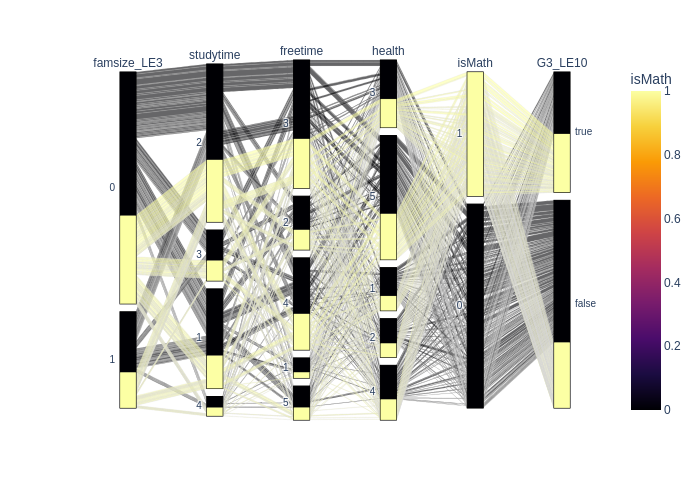

### Here we see interesting plot of parallel categories. Firstly we split our target variable into 2 sets, those with values less/equal than 10 and those with higher. From that perspective we could conclude that there is imbalance of G3 across classes.

### Also a distribution of chosen categories are very clear visible there. We see that most child are from family with more than 3, study time is in average around 2hrs, free time 3hrs etc.

### From the interactive plot, we see few interesting insights, among them:
- Students with 4hrs study time, are more likely to have better grade
- Grades from math are better overall

## Train Models

In [26]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
random_state = 42
ebm_search = [{}, {'learning_rate': 0.1, 'learning_rate': 0.001}]
lr_search = [{}, *[{'penalty': p} for p in ['l2', 'none']]]
xgb_search = [{}]

ebm_best = None
lr_best = None
xgb_best = None

ebm_best_score = 0
lr_best_score = 0
xgb_best_score = 0

param_search = {'EBM': ebm_search, 'LR': lr_search, 'XGB': xgb_search}
models = {'EBM': ExplainableBoostingClassifier, 'LR': LogisticRegression, 'XGB': XGBClassifier}
best_ckpts = {'EBM': ebm_best, 'LR': lr_best, 'XGB': xgb_best}
best_scores = {'EBM': ebm_best_score, 'LR': lr_best_score, 'XGB': xgb_best_score}

In [27]:
fn = lambda val: float(val)

In [28]:
y_train.value_counts()

G3
11    127
10    119
13     89
12     85
14     73
15     62
8      54
9      47
0      43
16     41
17     30
18     22
7      15
6      14
5       8
19      5
20      1
dtype: int64

## Selecting best model

In [ ]:
for model_name in param_search.keys():
  print('Model name', model_name)  
  for params in param_search[model_name]:
    model = models[model_name](random_state=random_state, **params)
    if model_name == 'EBM':
      model.fit(X_train, y_train)
    else:
      model.fit(X_train, y_train.apply(float, axis=1))
    score = model.score(X_test, y_test)
    if score > best_scores[model_name] or best_ckpts[model_name] is None:
        best_ckpts[model_name] = model
        best_scores[model_name] = score

In [30]:
results = pd.DataFrame({'Model': ['EBM', 'LR', 'XGB'], 'Score': [best_scores['EBM'], best_scores['LR'], best_scores['XGB']]})
results

,Model,Score
0,EBM,0.167464
1,LR,0.167464
2,XGB,0.148325


Final results looks like follow.

EBM reference: https://interpret.ml/docs/ebm.html